# Binary class classification using MLP 

In [1]:
# Importing modules
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

### Loading data

In [2]:
cancer_data = load_breast_cancer()
X, y = cancer_data.data, cancer_data.target

### train/test split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling/Standardization of data

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Creating model

In [5]:
mlp = MLPClassifier(hidden_layer_sizes=(128), max_iter=1000, activation="tanh", random_state=42, learning_rate='constant', learning_rate_init=0.0001, solver='sgd', momentum=0.9)

### Training model

In [6]:
mlp.fit(X_train, y_train)

,hidden_layer_sizes,128
,activation,'tanh'
,solver,'sgd'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.0001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


### Evaluation of model

In [7]:
y_pred = mlp.predict(X_test) # kreiranje predikcija za test set

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 97.37%


In [8]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


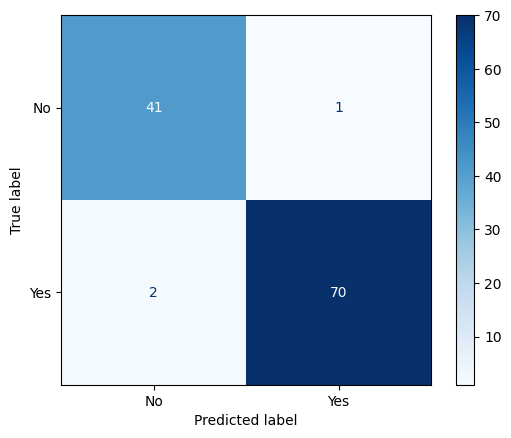

In [9]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred = mlp.predict(X_test)
cm_nn = confusion_matrix(y_pred,y_test)
disp = ConfusionMatrixDisplay(cm_nn,display_labels=['No','Yes'])
disp.plot(cmap=plt.cm.Blues)
plt.show()